In [1]:

import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns


In [2]:
df = pd.read_csv(r"D:\MLProjects\ZDatasets\AirlineData\data\Data_Train.csv")
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [4]:

condtion = df['Route'].isnull()==True
df[condtion]



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [5]:
condtion = df['Total_Stops'].isnull()==True
df[condtion]


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9038,Air India,06-05-2019,Delhi,Cochin,NaN,09:45,07-05-2023 09:25,23h 40m,NaN,No info,7480


In [6]:
# replace missing Value of Route using Mode as Route is categorical COlumn
modeOfRoute = df['Route'].mode()[0]
modeOfRoute

df['Route'].fillna(modeOfRoute,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# replace missing Value of Total_Stops using Mode as Total_Stops is categorical COlumn
modeOfTotal_Stops = df['Total_Stops'].mode()[0]
df['Total_Stops'].fillna(modeOfTotal_Stops,inplace=True)
df.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:

# Problem statement is to predict the airfare
# Size of the Data
# View of the Data
# Datatypes 
# Check Missing Values
# how mathematically look like?
# Check if the duplicate Values
# Correlation between columns
# Graph Analysis(CountPlot,barplot,boxplot)


In [9]:
# Size of the Data
df.shape


(10682, 11)

In [10]:
# View of the Data
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [11]:
# Datatypes 

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [12]:
# Check Missing Values

df.isnull().sum()



Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
# how mathematically look like?
df.describe()


,Price
count,10682.000000
mean,9086.292735
std,4610.885695
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [14]:
df.duplicated().sum()



220

In [15]:
df.drop_duplicates(inplace=True)


In [16]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


<Axes: >

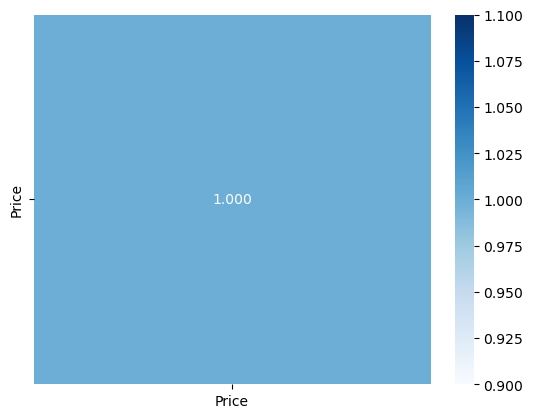

In [17]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap='Blues' ,fmt=".3f")


In [18]:
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10680,Vistara,01-03-2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [19]:
print(df['Airline'].value_counts())


Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [20]:
#counts/Unique


# Multiple carriers Premium economy with the Multiple carriers
# Jet Airways Business with Jet Airways
# Vistara Premium economy Vistara 

df['Airline'].replace("Multiple carriers Premium economy","Multiple carriers",inplace=True)
df['Airline'].replace("Jet Airways Business","Jet Airways",inplace=True)
df['Airline'].replace("Vistara Premium economy","Vistara",inplace=True)
print("----------------------")
print(df['Airline'].value_counts())


----------------------
Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


In [21]:
df['Source'].value_counts()


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64

In [22]:
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [23]:
df['Destination'].replace(to_replace="New Delhi",value="Delhi",inplace=True)
df['Destination'].value_counts()


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64

In [24]:
df.columns


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [25]:
# Know the Value counts of the categorical Data.

col1 = ['Airline','Source','Destination','Route','Duration','Additional_Info']

for i in col1:
    print(df[i].value_counts())
    print()
    print()


Jet Airways          3706
IndiGo               2043
Air India            1694
Multiple carriers    1209
SpiceJet              815
Vistara               481
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64


Delhi       4346
Kolkata     2860
Banglore    2179
Mumbai       696
Chennai      381
Name: Source, dtype: int64


Cochin       4346
Banglore     2860
Delhi        2179
Hyderabad     696
Kolkata       381
Name: Destination, dtype: int64


DEL ? BOM ? COK          2377
BLR ? DEL                1536
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
                         ... 
CCU ? VTZ ? BLR             1
CCU ? IXZ ? MAA ? BLR       1
BOM ? COK ? MAA ? HYD       1
BOM ? CCU ? HYD             1
BOM ? BBI ? HYD             1
Name: Route, Length: 128, dtype: int64


2h 50m     544
1h 30m     386
2h 45m     335
2h 55m     332
2h 35m     329
          ... 
36h 25m      1
30h 25m      1
30h 15m

In [26]:
# Graph based Analyis


In [27]:
# Count Plot , count of the specified feature



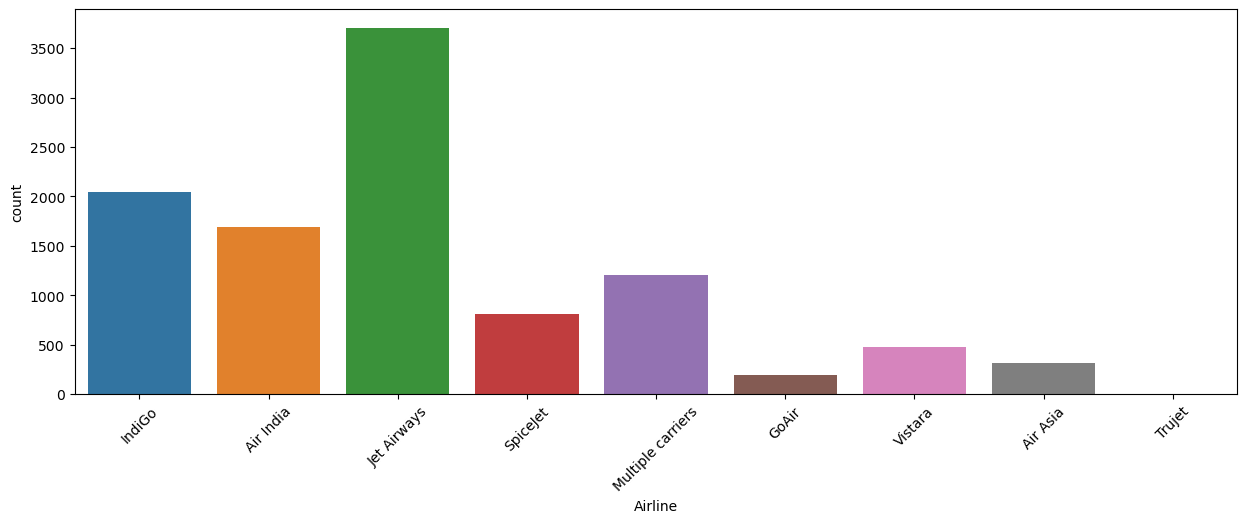

In [28]:
# Airline
# Jet Airways has the maximum flying While Truejest has the least
plt.figure(figsize=(15,5))
sns.countplot(x=df['Airline'])
plt.xticks(rotation=45) 
plt.show() 


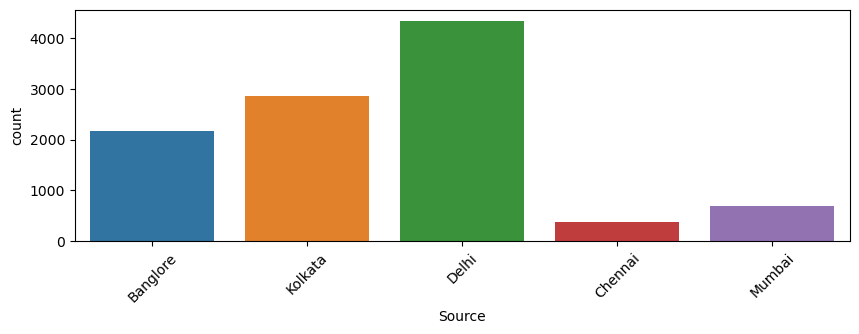

In [29]:
# Source
# Delhi has the maximum take offs chennai has the lest
plt.figure(figsize=(10,3))
sns.countplot(x=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


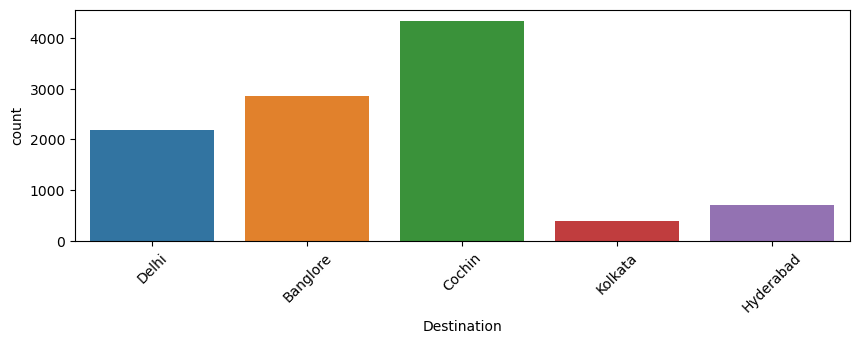

In [30]:
# Destination
# Coachin has the maximum Arrivals
plt.figure(figsize=(10,3))
sns.countplot(x=df['Destination'])
plt.xticks(rotation=45) 
plt.show() 


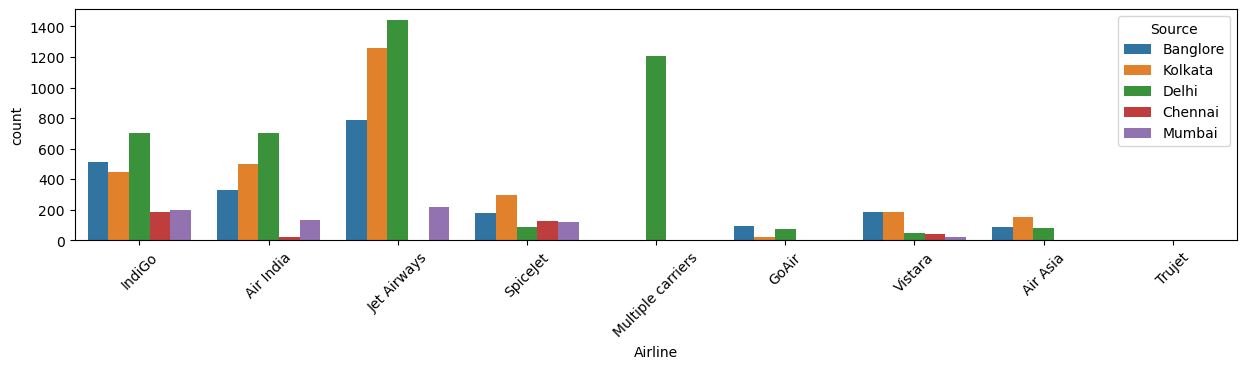

In [31]:
# multivariate Analysis
plt.figure(figsize=(15,3))
sns.countplot(x=df['Airline'],hue=df['Source'])
plt.xticks(rotation=45) 
plt.show() 


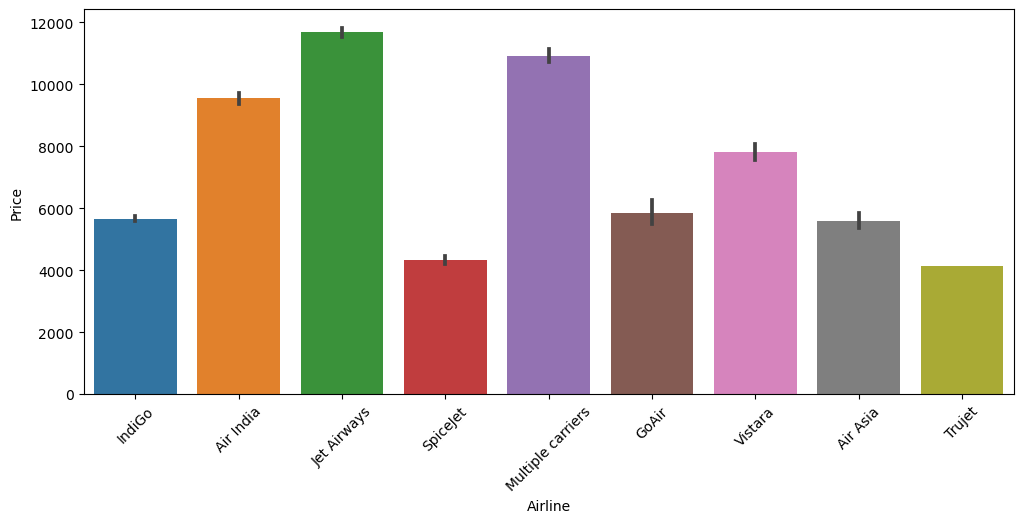

In [32]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


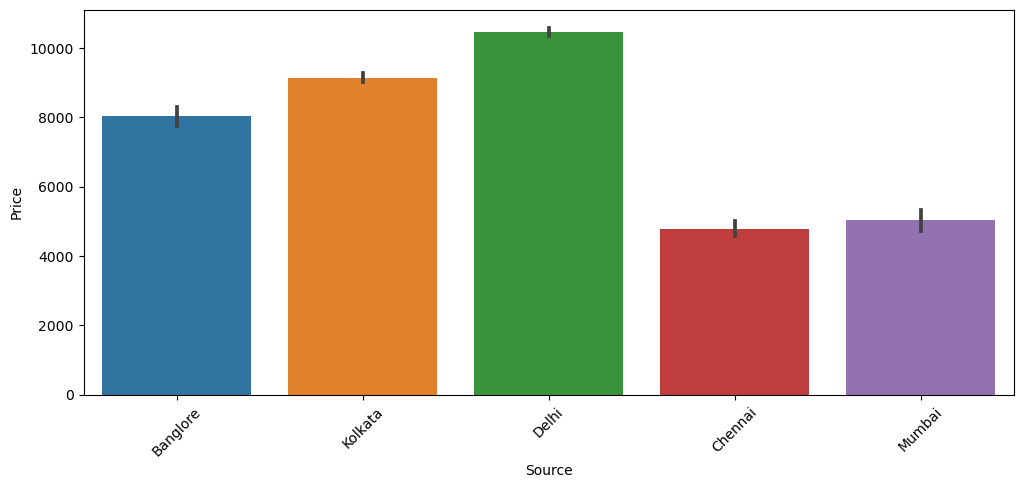

In [33]:

plt.figure(figsize=(12,5))
sns.barplot(x=df['Source'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Figure size 1000x1000 with 0 Axes>

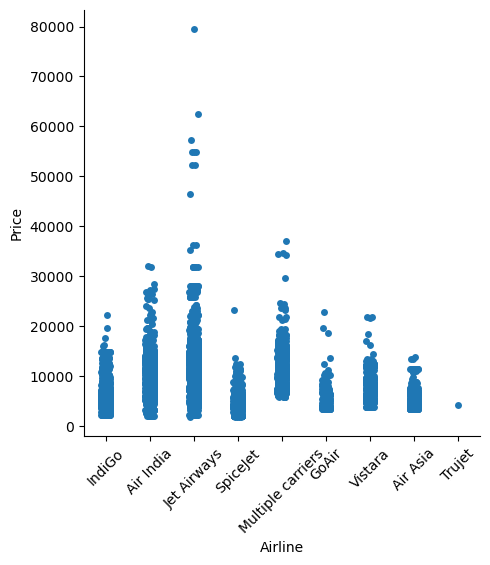

In [39]:
plt.figure(figsize=(10,10))
sns.catplot(x=df['Airline'], y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


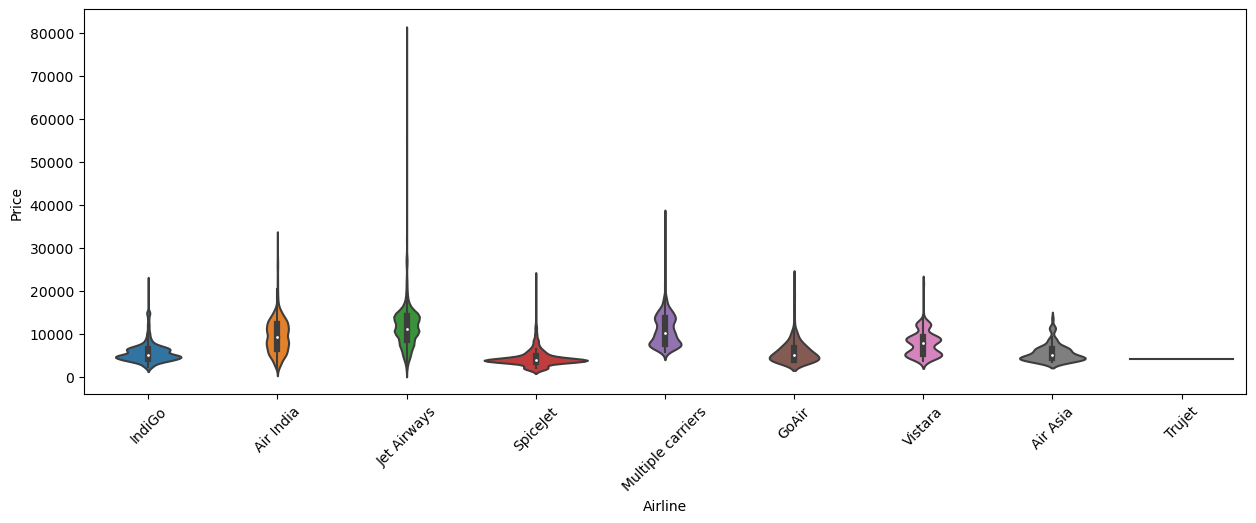

In [34]:

plt.figure(figsize=(15,5))
sns.violinplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


In [35]:
'''
plt.figure(figsize=(15,5))
sns.swarmplot(x=df['Airline'],y=df['Price'])
plt.xticks(rotation=45) 
plt.show() 

'''

"\nplt.figure(figsize=(15,5))\nsns.swarmplot(x=df['Airline'],y=df['Price'])\nplt.xticks(rotation=45) \nplt.show() \n\n"

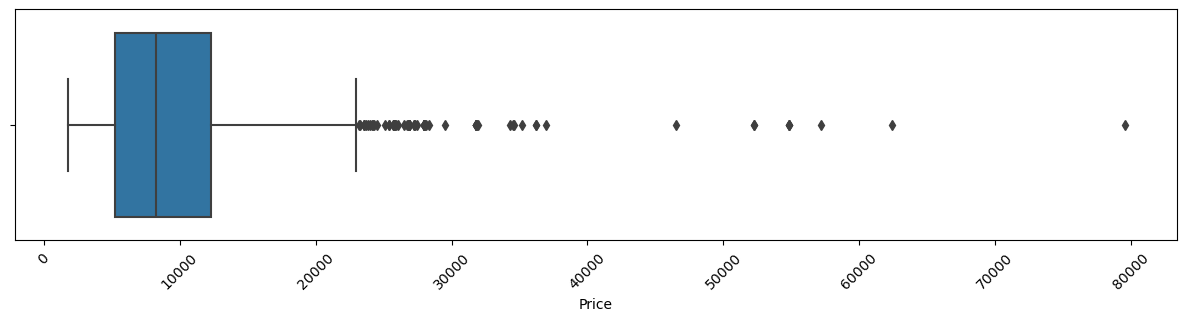

In [47]:
# Outlier Detection
plt.figure(figsize=(15,3))

sns.boxplot(x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 



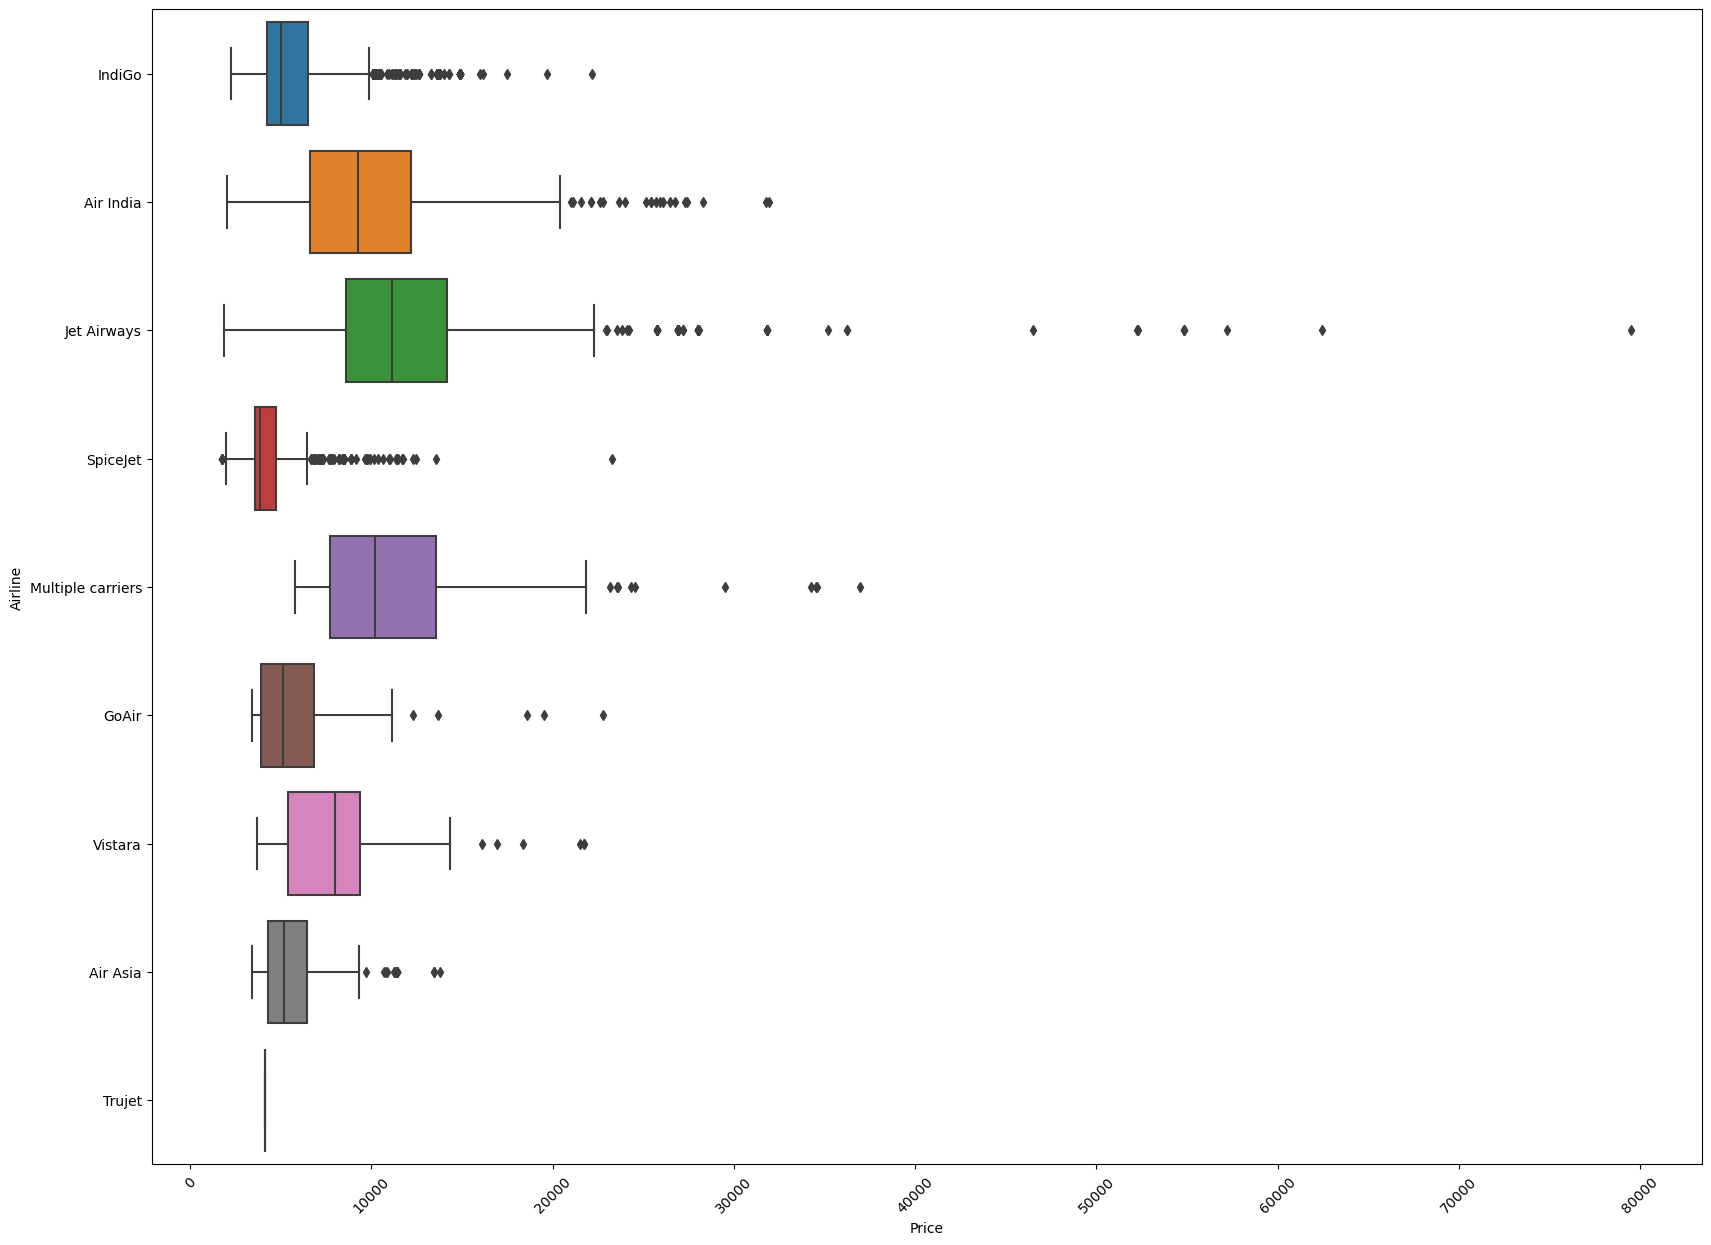

In [48]:
# Outlier Detection

plt.figure(figsize=(20,15))
sns.boxplot(y=df['Airline'],x=df['Price'])
plt.xticks(rotation=45) 
plt.show() 


<Axes: xlabel='Price', ylabel='Density'>

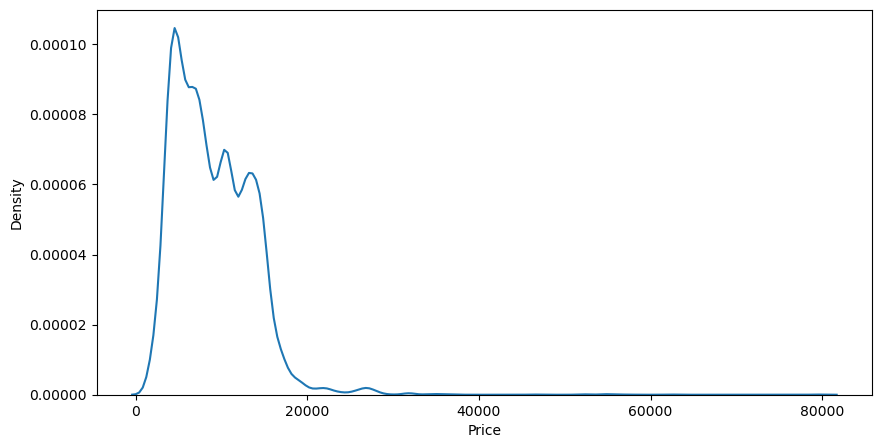

In [51]:

plt.figure(figsize=(10,5))
sns.kdeplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

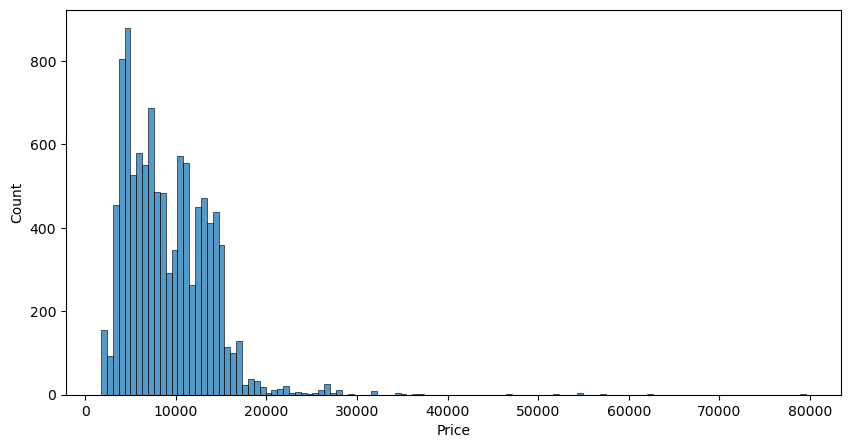

In [57]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'])


<Axes: xlabel='Price', ylabel='Count'>

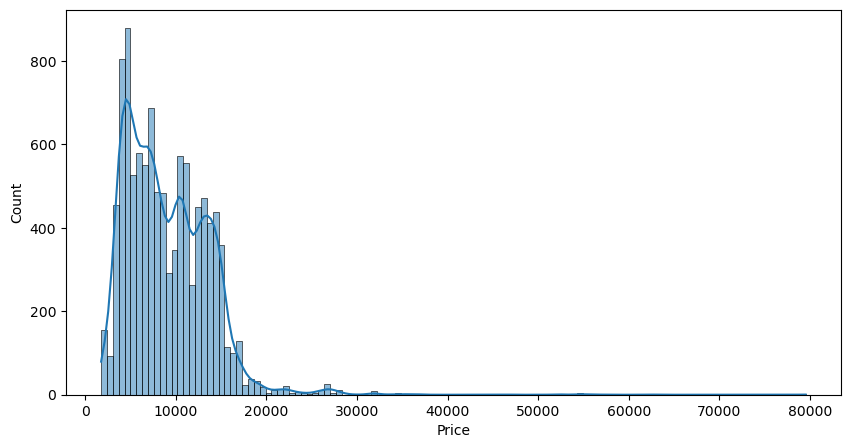

In [56]:
df['Airline']
plt.figure(figsize=(10,5))
sns.histplot(x=df['Price'],kde=True)


In [ ]:
df[df['Airline']=='Air India']

In [95]:
for i in list(enumerate(df['Airline'].unique())):
    print(i[0]+1)
    

1
2
3
4
5
6
7
8
9


In [70]:
df['Airline'].unique()


array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia', 'Trujet'],
      dtype=object)

In [72]:
listOfAirline = list(enumerate(df['Airline'].unique()))
listOfAirline


[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]

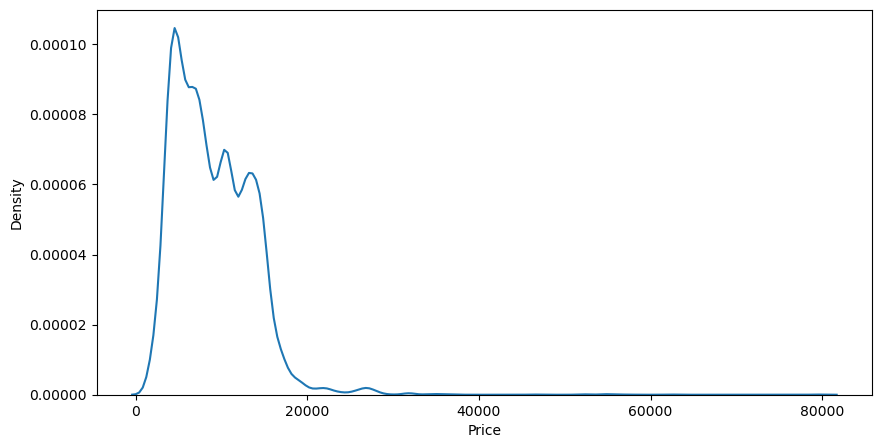

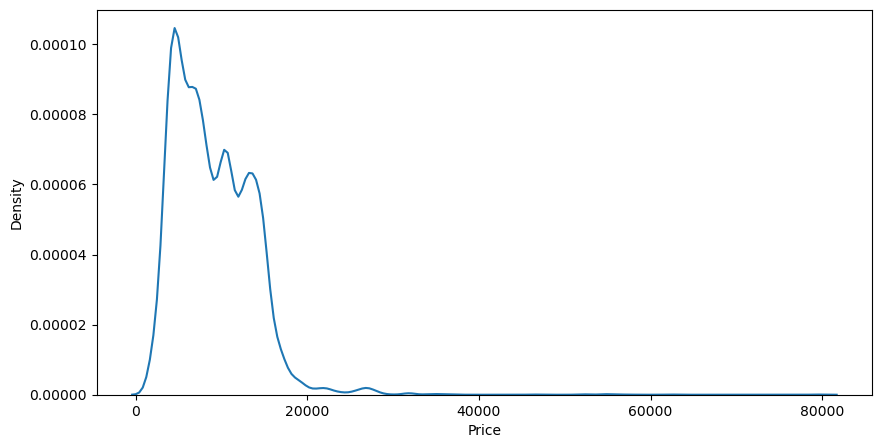

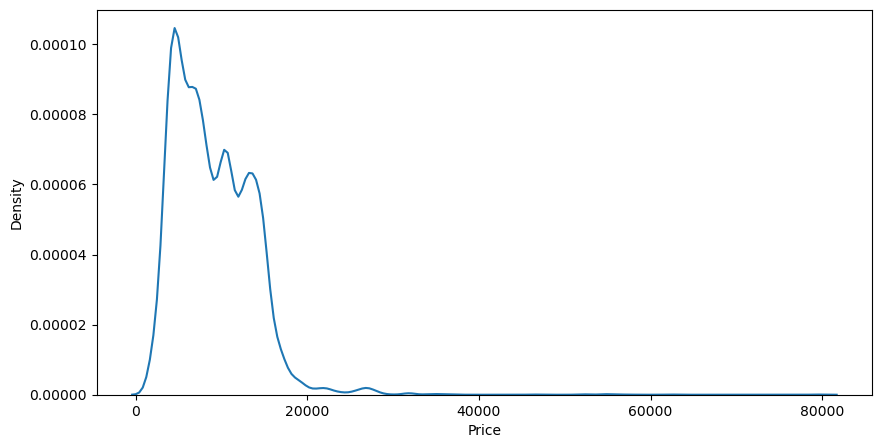

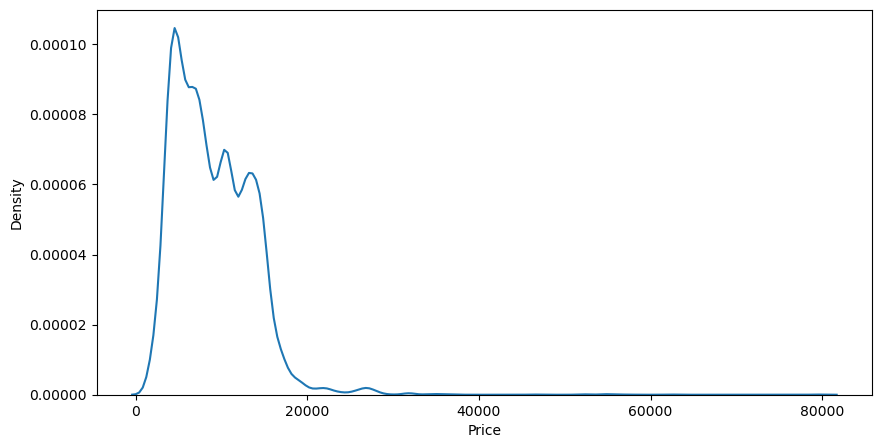

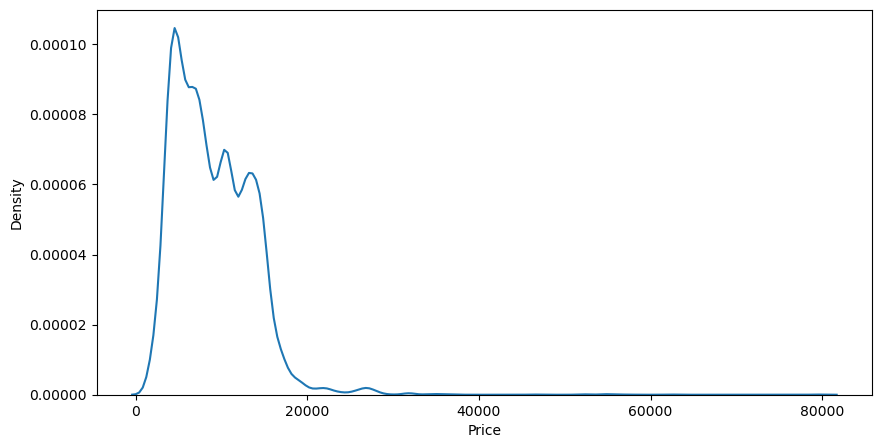

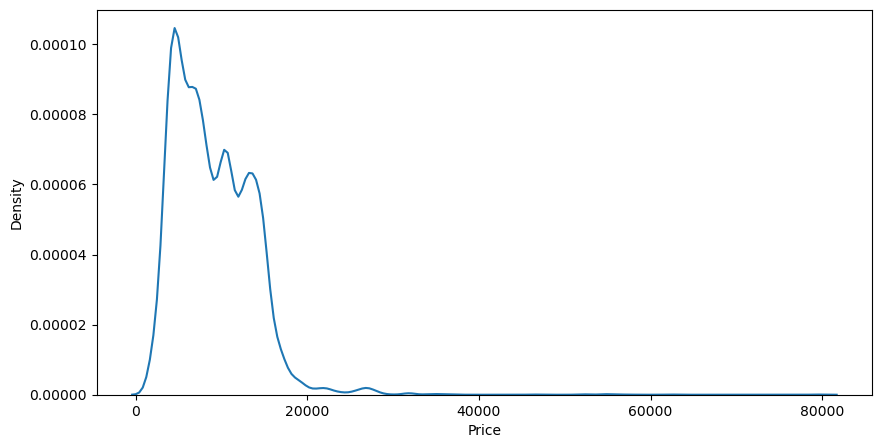

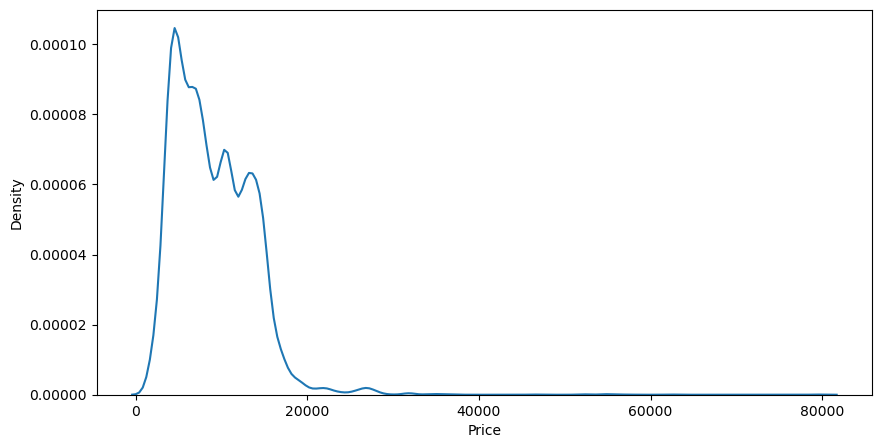

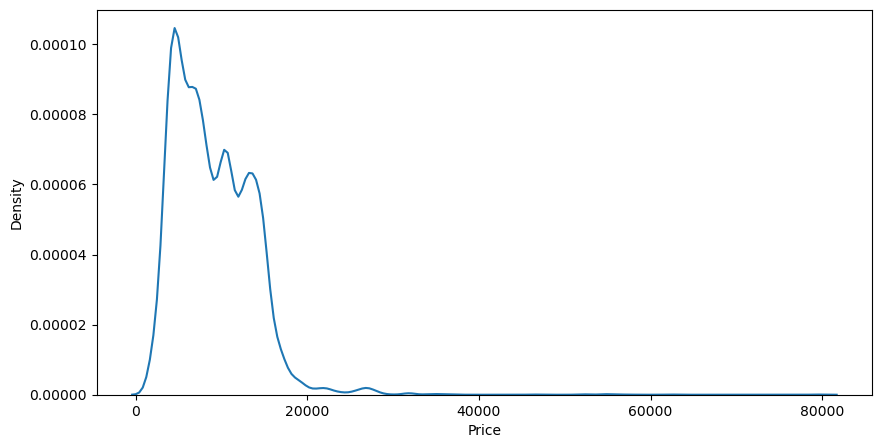

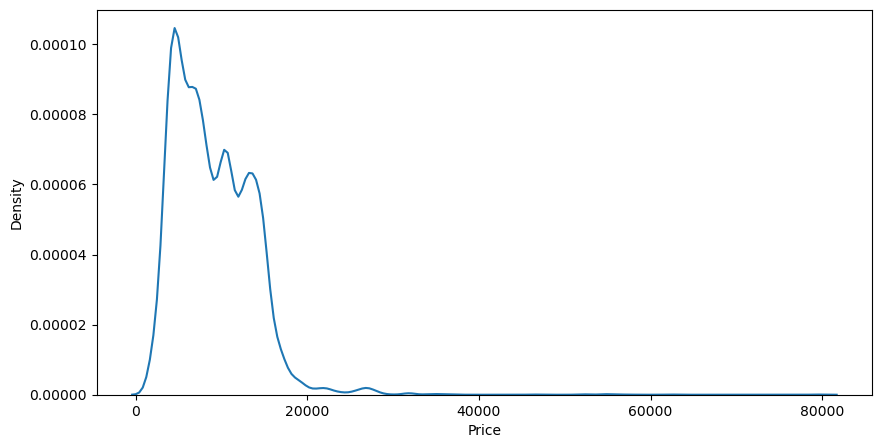

In [85]:
for i in listOfAirline:
    plt.figure(figsize=(10,5))
    sns.kdeplot(x=df['Price'])

    


In [92]:
df[df['Airline']=='Jet Airways']



,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882
6,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,18:55,13-03-2023 10:25,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,01-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:00,02-03-2023 05:05,21h 5m,1 stop,No info,22270
8,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,08:55,13-03-2023 10:25,25h 30m,1 stop,In-flight meal not included,11087
13,Jet Airways,09-05-2019,Kolkata,Banglore,CCU ? BOM ? BLR,21:10,10-05-2023 09:20,12h 10m,1 stop,In-flight meal not included,9663
...,...,...,...,...,...,...,...,...,...,...,...
10665,Jet Airways,12-06-2019,Delhi,Cochin,DEL ? BOM ? COK,18:15,13-06-2023 19:00,24h 45m,1 stop,In-flight meal not included,10262
10666,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,22:55,13-03-2023 20:20,21h 25m,1 stop,In-flight meal not included,11087
10667,Jet Airways,09-05-2019,Delhi,Cochin,DEL ? JDH ? BOM ? COK,11:40,19:00,7h 20m,2 stops,No info,21219
10673,Jet Airways,12-03-2019,Banglore,Delhi,BLR ? BOM ? DEL,20:35,13-03-2023 21:20,24h 45m,1 stop,In-flight meal not included,11087


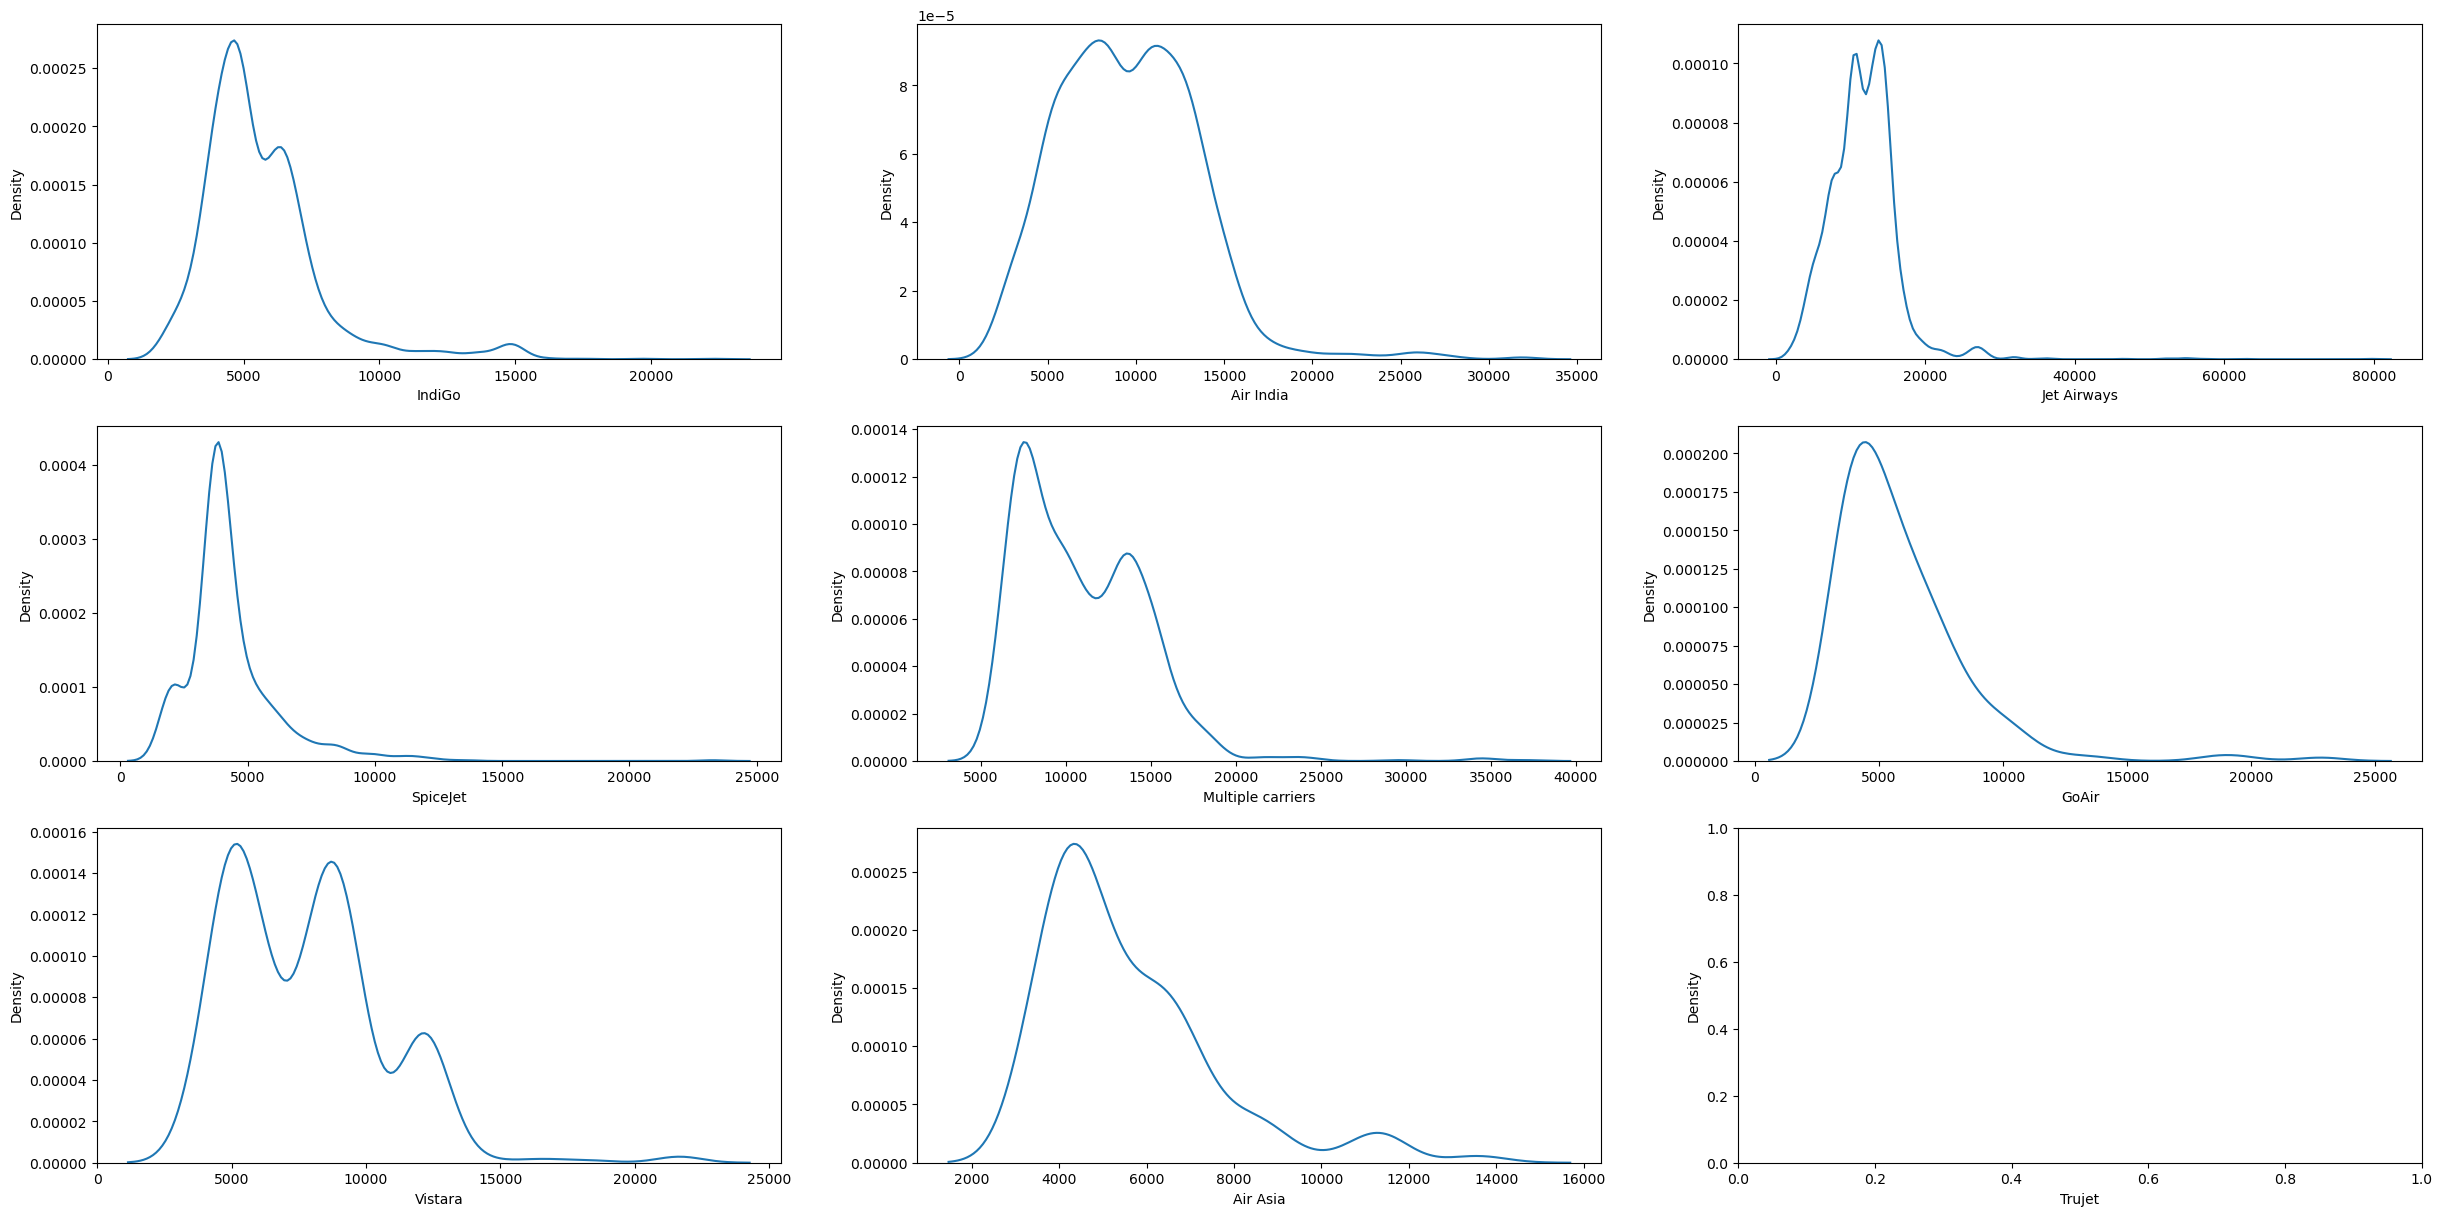

In [96]:
'''[(0, 'IndiGo'),
 (1, 'Air India'),
 (2, 'Jet Airways'),
 (3, 'SpiceJet'),
 (4, 'Multiple carriers'),
 (5, 'GoAir'),
 (6, 'Vistara'),
 (7, 'Air Asia'),
 (8, 'Trujet')]'''



plt.figure(figsize=(30,20))

for i in listOfAirline:
    plt.subplot(4,3,i[0]+1)

    indi = df[df['Airline']==i[1]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 


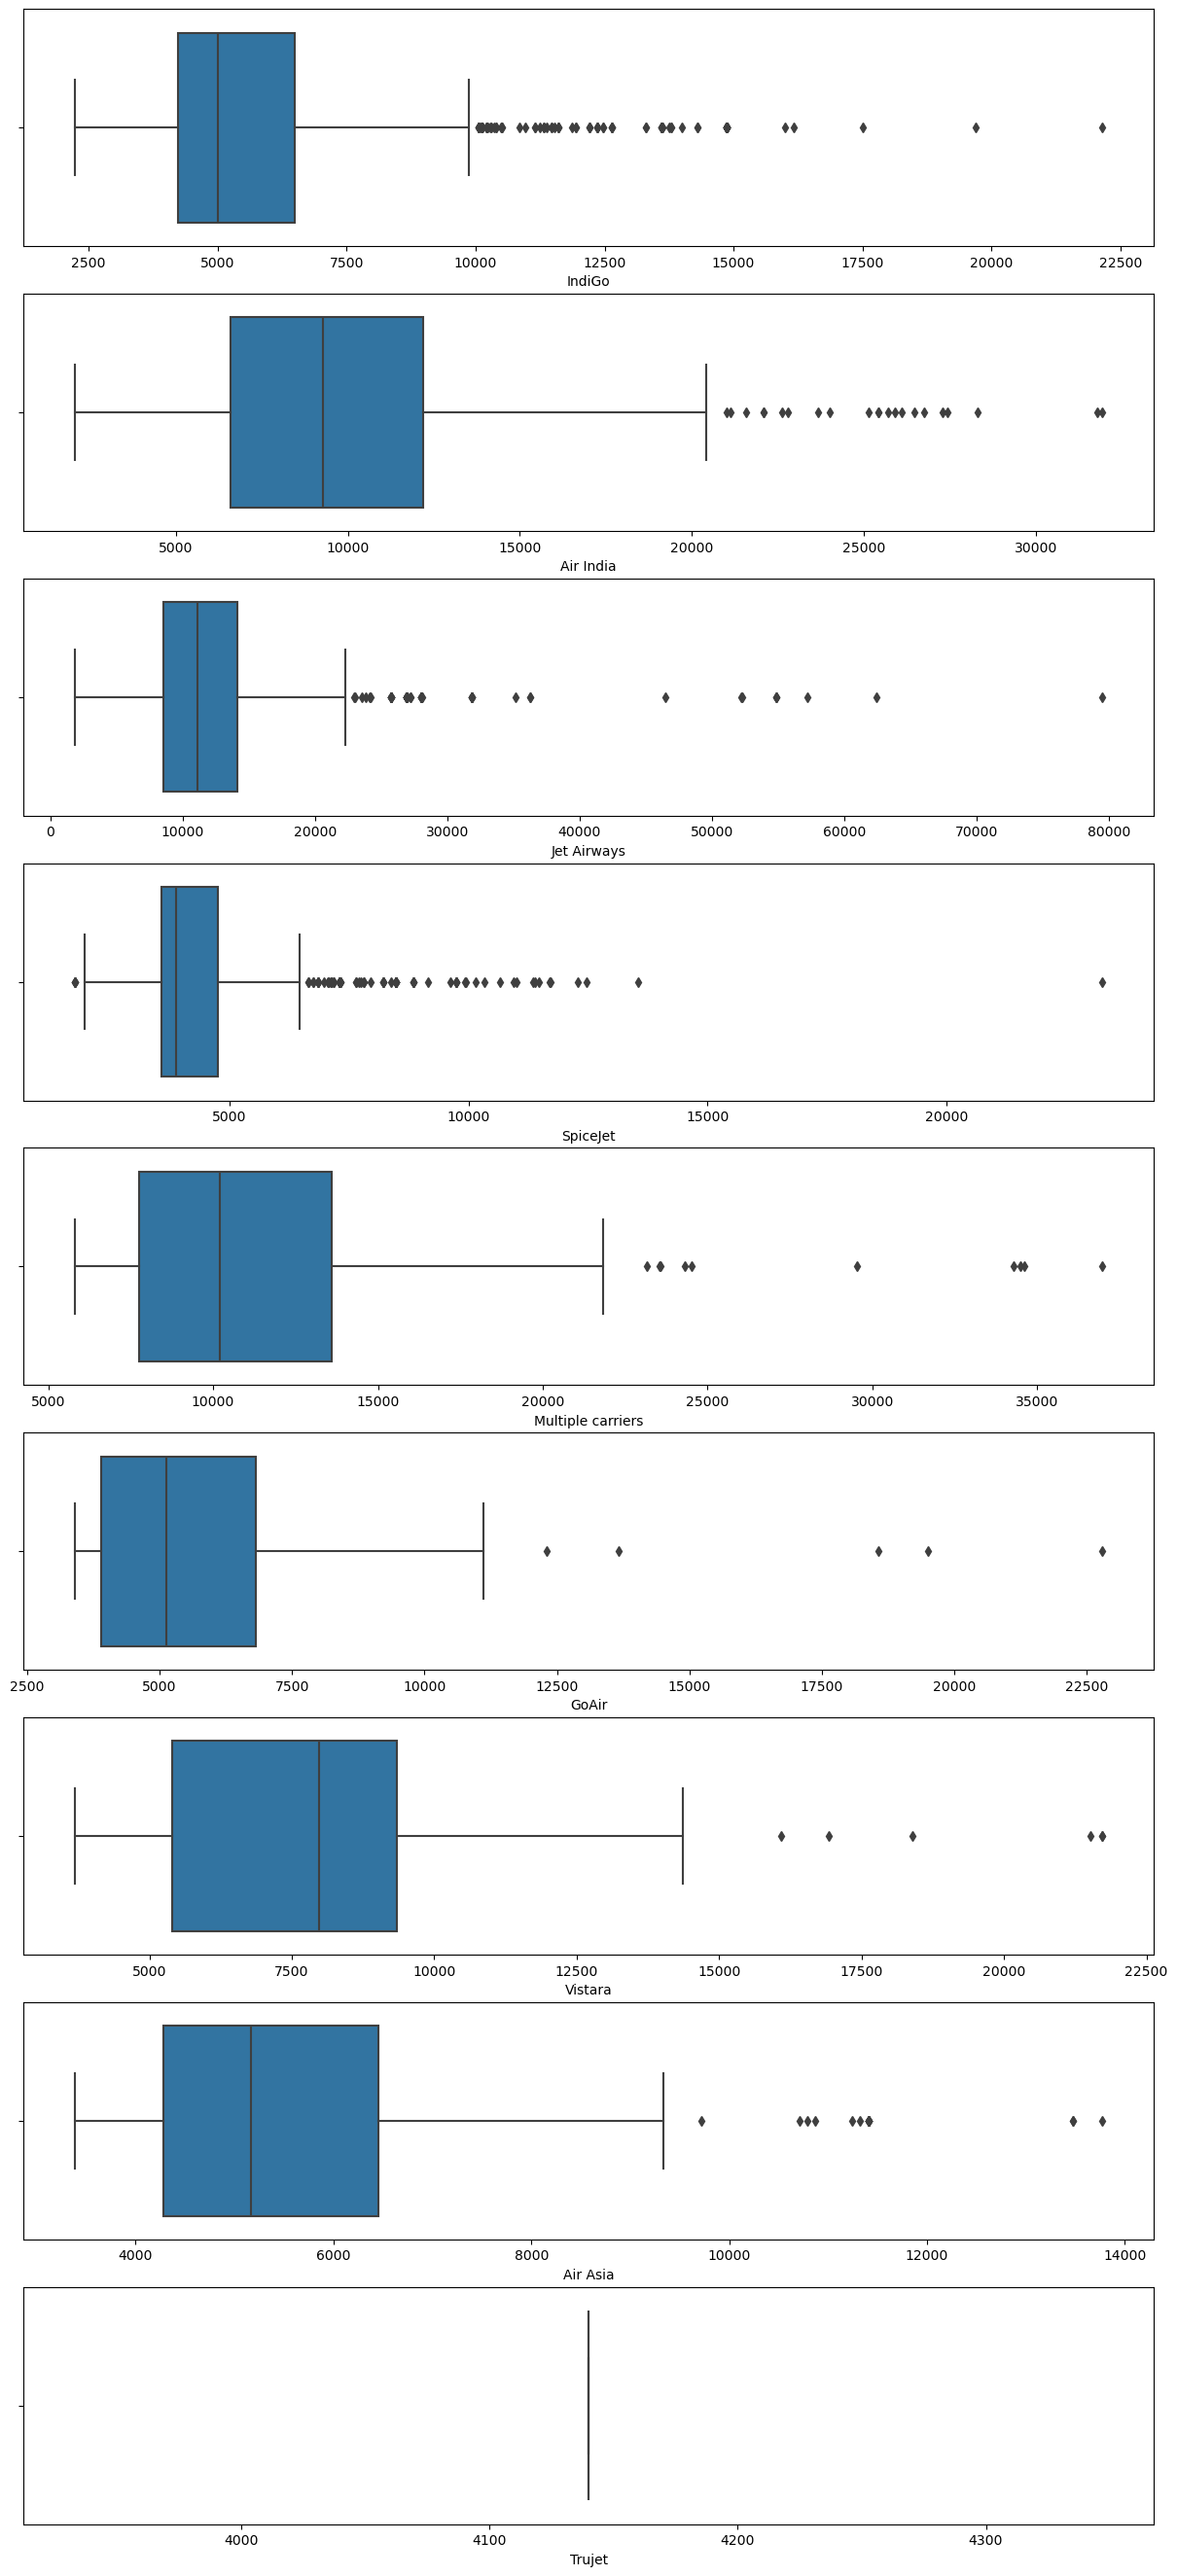

In [97]:
plt.figure(figsize=(15,45))

for i in list(enumerate(df['Airline'].unique())):
    plt.subplot(12,1,i[0]+1)
    indi = df[df['Airline']==df['Airline'].unique()[i[0]]]
    sns.boxplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [ ]:
plt.figure(figsize=(20,20))

for i in list(enumerate(final_df['Airline'].unique())):
    plt.subplot(3,4,i[0]+1)
    indi = final_df[final_df['Airline']==i[0]]
    sns.kdeplot(x=indi['Price'])
    plt.xlabel(i[1]) 



In [100]:

df['Date_of_Journey']

# Day
# Month
# Year


0        24-03-2019
1        01-05-2019
2        09-06-2019
3        12-05-2019
4        01-03-2019
            ...    
10677    09-04-2019
10678    27-04-2019
10679    27-04-2019
10680    01-03-2019
10681    09-05-2019
Name: Date_of_Journey, Length: 10462, dtype: object

In [103]:
df['Day'] = pd.to_datetime(df["Date_of_Journey"],format="%d-%m-%Y").dt.day

df['Day']


0        24
1         1
2         9
3        12
4         1
         ..
10677     9
10678    27
10679    27
10680     1
10681     9
Name: Day, Length: 10462, dtype: int64

In [104]:
df['Month'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.month
df['Month']


0        3
1        5
2        6
3        5
4        3
        ..
10677    4
10678    4
10679    4
10680    3
10681    5
Name: Month, Length: 10462, dtype: int64

In [106]:
df['Year'] = pd.to_datetime(df['Date_of_Journey'],format="%d-%m-%Y").dt.year
df['Year']


0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10677    2019
10678    2019
10679    2019
10680    2019
10681    2019
Name: Year, Length: 10462, dtype: int64

In [107]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24-03-2019,Banglore,Delhi,BLR ? DEL,22:20,22-03-2023 01:10,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,10-06-2023 04:25,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01-03-2019,Banglore,Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,09-04-2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10678,Air India,27-04-2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10679,Jet Airways,27-04-2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10680,Vistara,01-03-2019,Banglore,Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [ ]:

columName = 'Dept_Hour'
columName = columName.split("_")[0]
df[columName+"_Hour"] = pd.to_datetime(df['Dep_Time']).dt.hour
df[columName+"_Hour"]

df


In [ ]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

df['Dept_Hour']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dept_Minute']=pd.to_datetime(df['Dep_Time']).dt.minute

df['Arr_Hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_Minute']=pd.to_datetime(df['Arrival_Time']).dt.minute

df.head(5)

In [ ]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time



In [ ]:
df['Duration'].unique()

In [ ]:
df['Duration']

In [ ]:
df["hoursMinutes"] = 0
for i in df.index:
    if " " in df.loc[i,'Duration']:
        column1 = df.loc[i,'Duration'].split(" ")[0]
        column2 = df.loc[i,'Duration'].split(" ")[1]
        
        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        if "h" in column2:
            column2 =  (int(column2.replace("h",""))*60)
        elif "m" in column2:
            column2 =  (int(column2.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1 + column2 

    else:
        column1 = df.loc[i,'Duration']

        if "h" in column1:
            column1 =  (int(column1.replace("h",""))*60)
        elif "m" in column1:
            column1 =  (int(column1.replace("m","")))
        
        df.loc[i,'hoursMinutes'] = column1

        
df



In [ ]:
df = df.drop(["Arrival_Time","Arrival_Time","Dep_Time","Date_of_Journey","Route","Duration","Additional_Info"], axis = 1)
df.head(2)



In [ ]:
df['Total_Stops'].unique()

In [ ]:
df.columns
data_train = df[['Airline', 'Source', 'Destination', 'Total_Stops', 'Day','Month', 'Year',
                         'Dept_Hour', 'Dept_Minute', 'Arr_Hour', 'Arr_Minute','hoursMinutes','Price',]]

data_train

In [ ]:
# target Feature
y = data_train['Price']
y.head()



In [ ]:
# Remove Outlier


df['Airline'].unique()

airlineName = { 'IndiGo':      [0.25,0.75],
                "Air India":   [0.27,0.75],
                'Jet Airways': [0.27,0.75],
                'SpiceJet':    [0.10,0.60],
                'Multiple carriers':[0.20,0.80],
                'GoAir':       [0.20,0.75],
                'Vistara':     [0.20,0.75],
                'Air Asia':    [0.25,0.75],
                'Vistara Premium economy':[0.25,0.75],
                'Jet Airways Business':[0.25,0.75],
                'Multiple carriers Premium economy':[0.20,0.75],
                'Trujet':       [0,0]

              }


final_df = pd.DataFrame(columns=list(df.columns))
final_df
list(df.columns)

import pandas as pd


for key,value in airlineName.items():
    airDataSet = ""
    airDataSet = df[df['Airline'] == key]
    airDataSet
    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)
    q1 = airDataSet['Price'].quantile(value[0])
    q3 = airDataSet['Price'].quantile(value[1])
    IQR = q3-q1
    lowerLimit = q1-IQR*1.5
    upperLimit = q3+IQR*1.5
    lowerLimitIndex = airDataSet[airDataSet['Price']<=lowerLimit].index
    upperLimitIndex = airDataSet[airDataSet['Price']>=upperLimit].index
    if airDataSet.shape[0] > 5 : 
        airDataSet.drop(lowerLimitIndex,axis=0,inplace=True)
        airDataSet.drop(upperLimitIndex,axis=0,inplace=True)
    else:
        pass

    df[df.index.isin([2878])]

    plt.figure(figsize=(15,2))
    sns.boxplot(x=airDataSet['Price'])
    plt.xlabel(key)

    
    #airDataSet1 = airDataSet1.append(airDataSet, ignore_index=True)  # ignore_index=True resets the index

    final_df = pd.concat([final_df, airDataSet], axis=0)  # axis=0 is the default and means appending vertically


    
final_df


In [ ]:
# independat Feature
X = data_train.drop(['Price'],axis=1)
X


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train



In [ ]:
X_train['Airline'].unique()

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
import pandas as pd
from sklearn.preprocessing import MinMaxScaler,StandardScaler

def methodPreprocessing():
    trf1 = ColumnTransformer([
        ('OneHot',OneHotEncoder(drop='first',handle_unknown='ignore'),[0,1,2])],remainder='passthrough')
    
    trf2 = ColumnTransformer([
        ('Ordinal',OrdinalEncoder(categories=[['non-stop', '1 stop', '2 stops', '3 stops', '4 stops']]),[18])]
         ,remainder='passthrough')

    trf3 = ColumnTransformer([
        ('scale', StandardScaler(), slice(0, 25))
    ])

    
    pipe = make_pipeline(trf1,trf2,trf3)
    return pipe



pipe = methodPreprocessing()


X_train = pipe.fit_transform(X_train)
pd.DataFrame(X_train.T)


In [ ]:
X_test = pipe.transform(X_test)
print()
pd.DataFrame(X_test).T


In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelRamdom = RandomForestRegressor()
modelRamdom.fit(X_train,y_train)


In [ ]:
X_train.shape

In [ ]:
y_pred = modelRamdom.predict(X_test)
y_pred

In [ ]:

scatter_color = 'red'
sns.scatterplot(y_test,y_pred,color=scatter_color)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")


In [ ]:
# Calculate residuals
residuals = y_test - y_pred
residuals = residuals.astype(float)
# Create a kernel density plot (KDE) for the residuals
sns.kdeplot(residuals)

# You can also add labels and a title to the plot for better understanding
plt.xlabel("Residuals")
plt.ylabel("Density")
plt.title("Residuals Distribution")

# Display the plot
plt.show()


In [ ]:
sns.scatterplot(y_pred,residuals)

In [ ]:
'''Preformance Metrix'''
import numpy as np
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


In [ ]:
## R Square and Adjusted R Square
from sklearn.metrics import r2_score
r2 = metrics.r2_score(y_test,y_pred)
score = r2
## Adjusted R square
#display adjusted R-squared

aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print('r2  : ',r2)

print('aR2 : ', aR2)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


modelDict = {'lasso': Lasso(),
            'ridge' : Ridge(),
             'random':RandomForestRegressor(),
             'linear':LinearRegression()
            }

modelDictWithDetails = {'VALUES':['MSE','MAE','RMSE','r2','aR2'],
                        'lasso': [],
                        'ridge' : [],
                        'random':[],
                        'linear':[]}

k=1
for key, value in modelDict.items():

    model=value
    print()
    print()
    print(model)
    print()

    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    y_pred
    
    plt.figure(figsize=(8,8))
    scatter_color = 'red'
    sns.scatterplot(y_test,y_pred,color=scatter_color)
    plt.xlabel("Test Truth Data")
    plt.ylabel("Test Predicted Data")
    plt.show()
    print()
    print()
    residuals = y_test-y_pred
    residuals = residuals.astype(float)

    plt.figure(figsize=(8,8))
    
    sns.kdeplot(residuals)
    
    plt.show()
    print()
    plt.figure(figsize=(8,8))
    sns.scatterplot(y_pred,residuals)
    plt.show()

    
    '''Preformance Metrix'''
    import numpy as np
    from sklearn import metrics
    from sklearn.metrics import mean_squared_error, mean_absolute_error

    MSE = metrics.mean_squared_error(y_test,y_pred)
    MAE = metrics.mean_absolute_error(y_test,y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_pred))

    print('MSE:',MSE)
    print('MAE:',MAE)
    print('RMSE:',RMSE)
    


    ## R Square and Adjusted R Square
    from sklearn.metrics import r2_score
    r2 = metrics.r2_score(y_test,y_pred)

    ## Adjusted R square
    #display adjusted R-squared

    aR2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

    modelDictWithDetails[key].append(MSE)
    modelDictWithDetails[key].append(MAE)
    modelDictWithDetails[key].append(RMSE)
    modelDictWithDetails[key].append(r2)
    modelDictWithDetails[key].append(aR2)

    
    print('r2  : ',r2)
    print('aR2 : ', aR2)
    r2 = 0
    aR2 = 0

    
print(modelDictWithDetails)



In [ ]:

models_value=pd.DataFrame(modelDictWithDetails)
models_value


In [ ]:
import pickle
file = open('flight_rf1.pk2','wb')
pickle.dump(modelRamdom,file)

In [ ]:
model = open('flight_rf1.pk2','rb')
modelRamdomModel = pickle.load(model)

In [ ]:
modelRamdomModel.predict(X_test[20].reshape(1,-1))

In [ ]:
# Create an empty dictionary
my_dict = {}

# List of keys and values to update the dictionary
keys = ['key1', 'key2', 'key3']
values = [10, 20, 30]

for i in range(len(keys)):
    if keys[i] in my_dict:
        my_dict[keys[i]].append(values[i])
    else:
        my_dict[keys[i]] = values[i]


        
        
print(my_dict)

list(my_dict.keys())[0]

In [ ]:
# Create an empty dictionary
my_dict = {}

# List of keys and values to update the dictionary
keys = ['key1', 'key2', 'key3']
values = [10, 20, 30]

for i in range(len(keys)):
    if keys[i] in my_dict:
        my_dict[i].append(values[i])
    else:
        my_dict[i] = values

        
        
print(my_dict)

list(my_dict.keys())[0]